In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sctk as sk
import seaborn

In [2]:
adata = sc.read_h5ad("../data/rna/scRNA_batch1_2.processed.fibroblasts.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 26727 × 17590
    obs: 'doublet_bh_pval', 'n_counts', 'sample_id', 'scrublet_score', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'annot_batch1_lr', 'annot_batch1_lr_prob', 'annot_batch2_lr', 'annot_batch2_lr_prob', 'leiden_bk_r0_1', 'leiden_bk_r0_3', 'leiden_bk_r0_5', 'is_doublet', 'leiden_bk_split1', 'leiden_bk_split2', 'leiden_bk_split3', 'annot1', 'leiden_bk_split4', 'annot_gut_lr', 'annot_gut_lr_prob', 'broad_annot1'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'cc', 'highly_variable', 'highly_variable_nbatches', 'hvg_full'
    uns: 'annot1_colors', 'leiden', 'neighbors', 'neighbors_bk', 'pca', 'umap'
    obsm: 'X_pca'

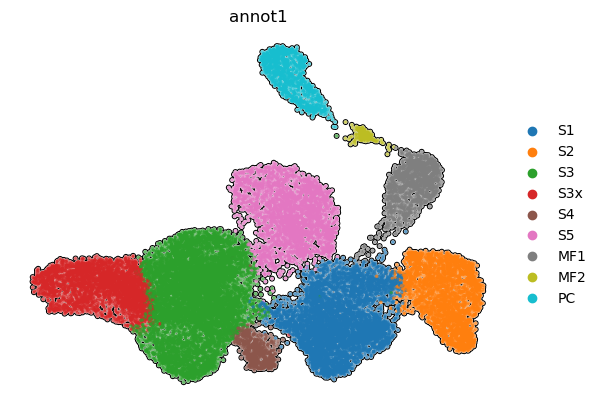

In [4]:
sc.pl.umap(
    adata,
    color='annot1',
    palette='tab10',
    frameon=False,
    size=25,  # point size
    add_outline=True,
    #legend_loc='on data',
    #save='UMAP_RNA_fibroblast_MF_PC_outline.pdf'  # in ./figures
)

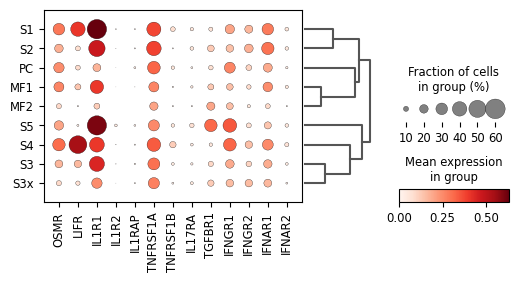

In [31]:
# IL1 ligands:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5756628/
receptors = ["OSMR", "LIFR", "IL1R1", "IL1R2", "IL1RAP", "TNFRSF1A", "TNFRSF1B", "IL17RA", "TGFBR1", "IFNGR1", "IFNGR2", "IFNAR1", "IFNAR2"]

sc.pl.dotplot(adata,
              var_names=receptors,
              groupby='annot1', dendrogram=True, log=True,
              figsize=(6.0, 2.5),
              save="receptors.pdf"
            )

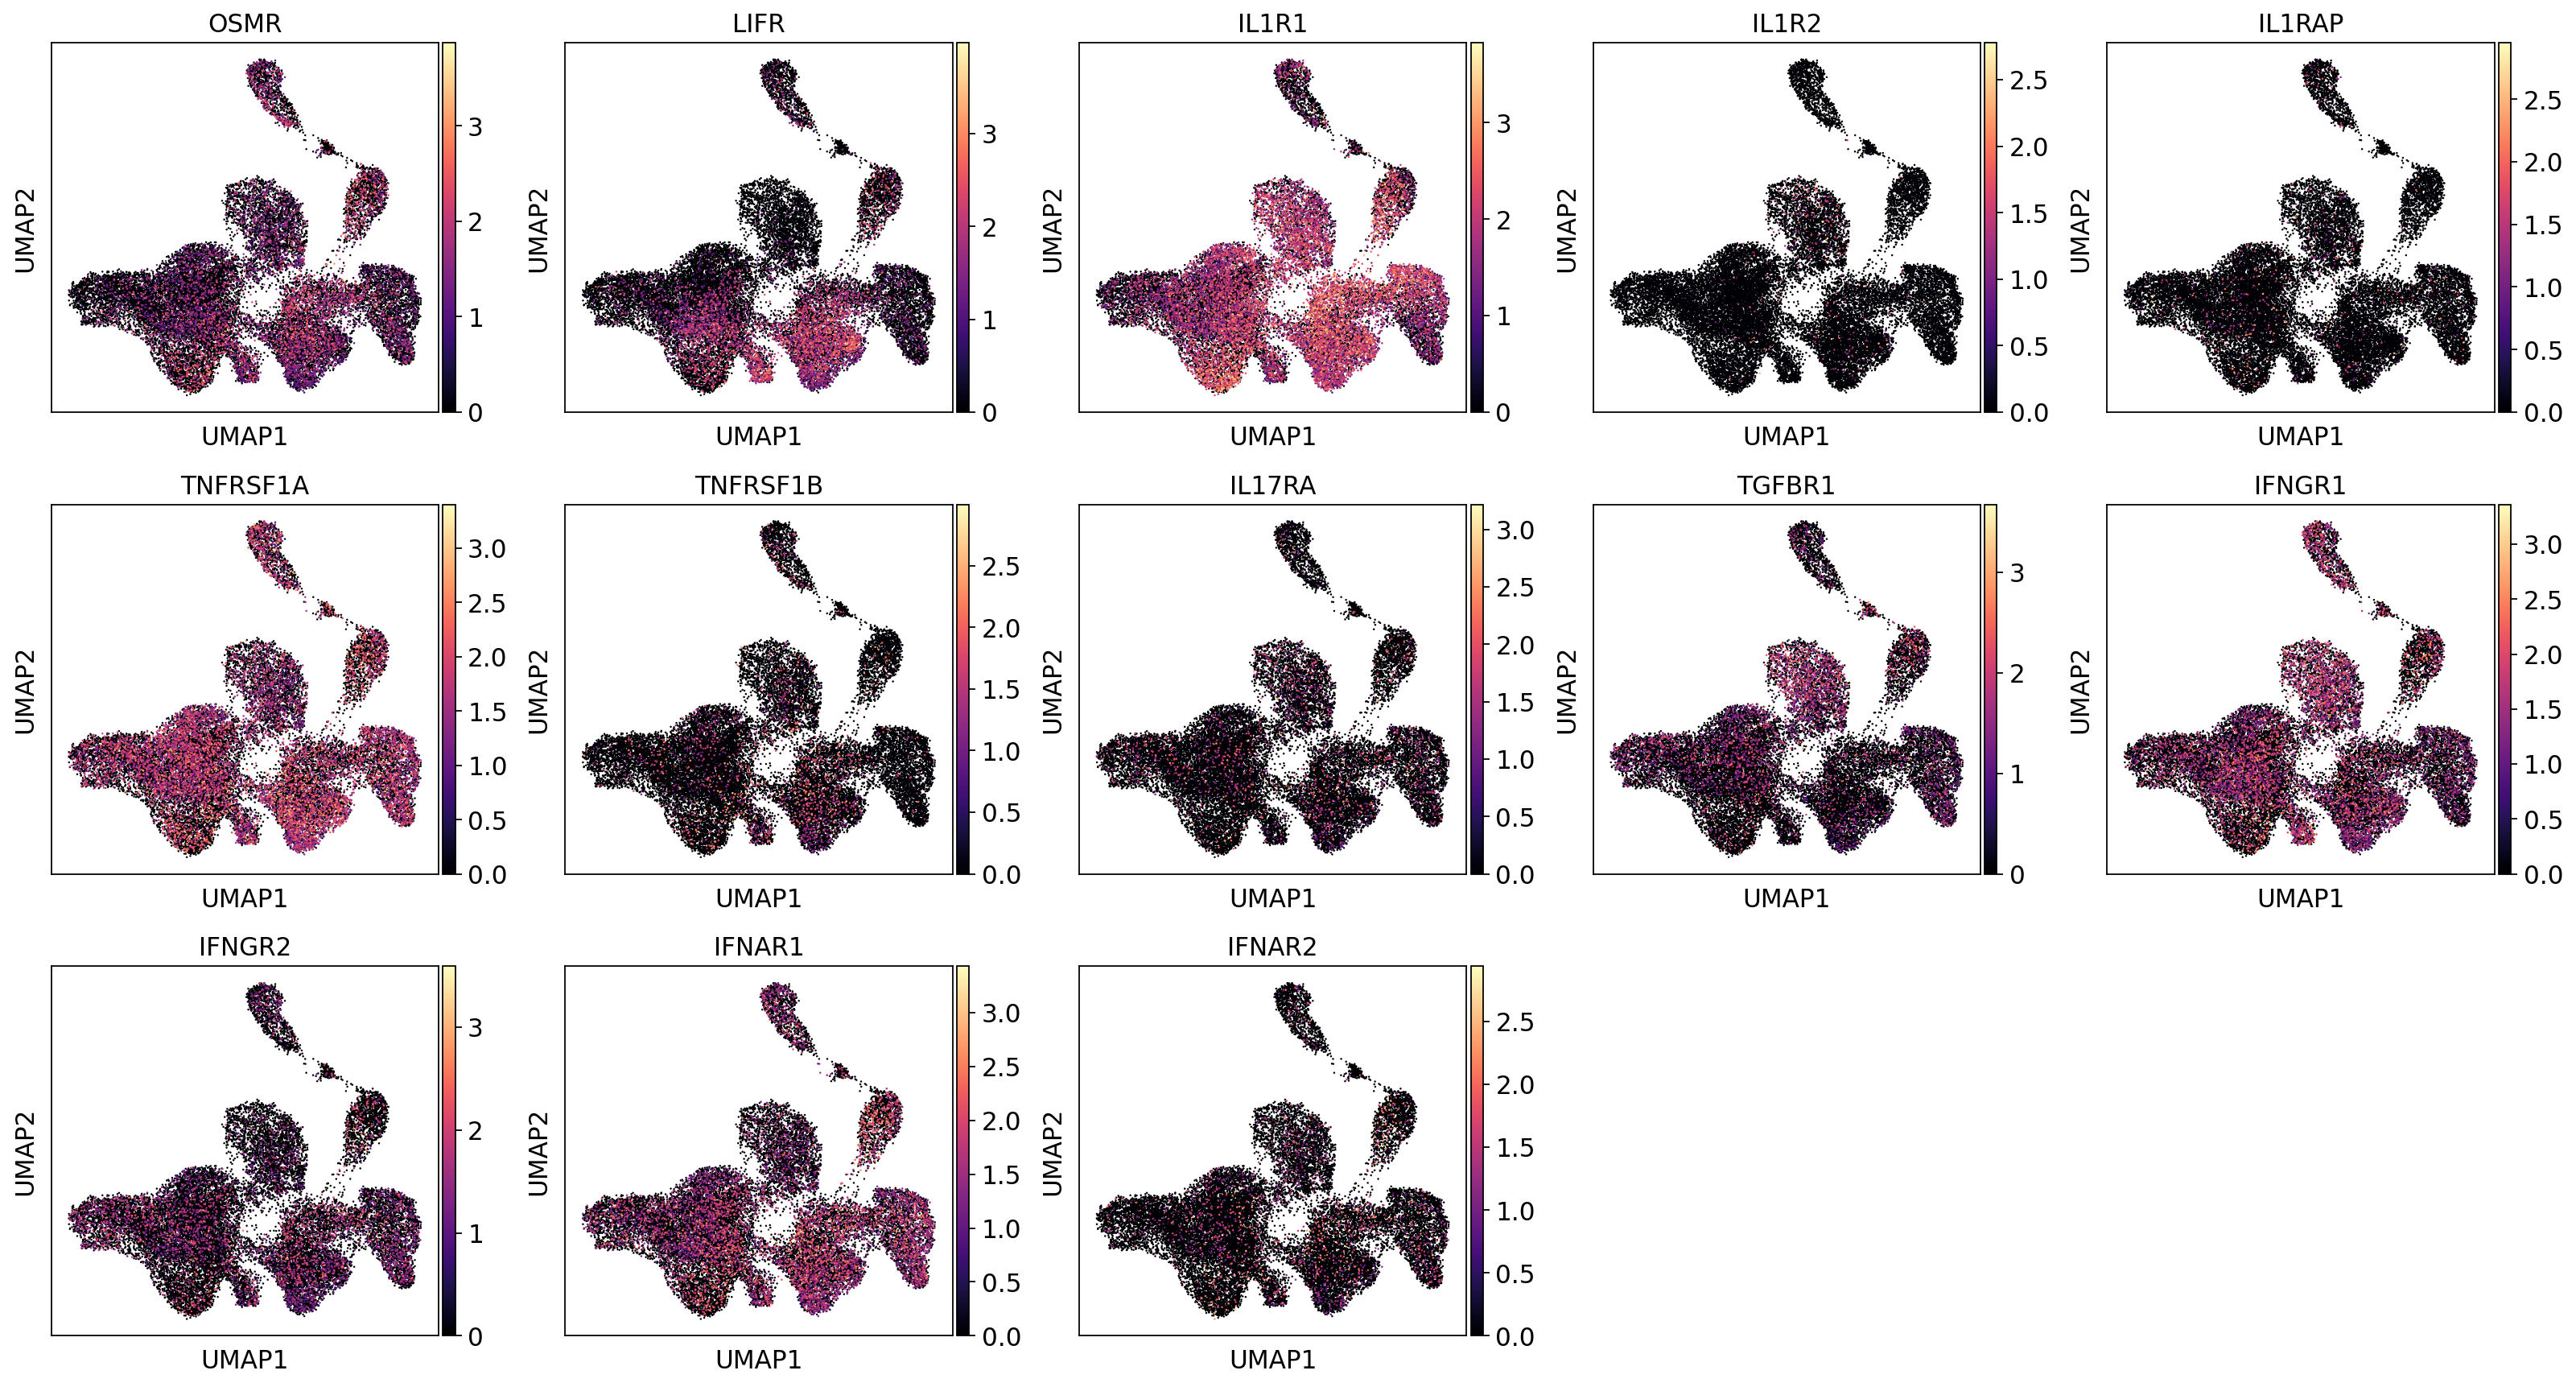

In [32]:
sc.set_figure_params(dpi_save=300)
sc.pl.umap(
    adata,
    #color=sum(marker_dict.values(), []),  # gets values of marker dictionary
    color=receptors,
    #palette='tab10',
    color_map='magma',
    #frameon=False,
    size=5,  # point size
    #add_outline=True,
    ncols=5,
    #legend_loc='on data',
    #save='_RNA_fibroblast_MF_PC_top5_markers.pdf'  # in ./figures
)

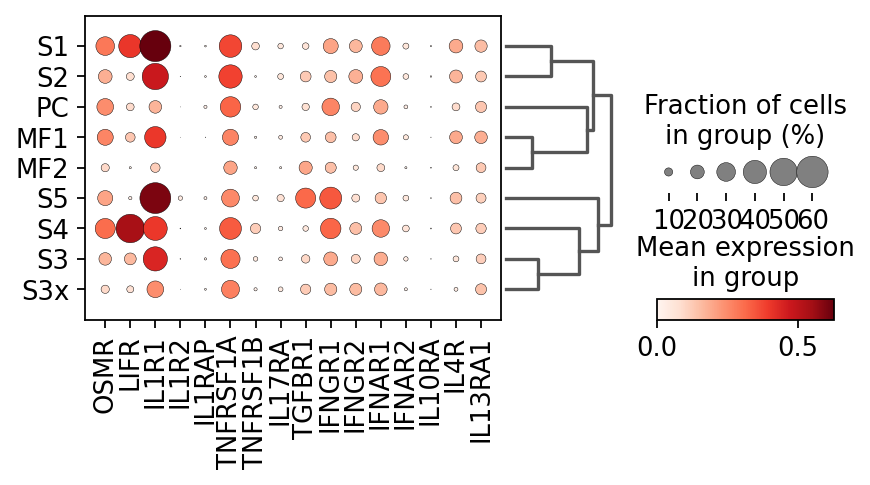

In [38]:
# IL1 ligands:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5756628/
receptors = ["OSMR", "LIFR", "IL1R1", "IL1R2", "IL1RAP", "TNFRSF1A", "TNFRSF1B", "IL17RA", "TGFBR1", "IFNGR1", "IFNGR2", "IFNAR1", "IFNAR2", "IL10RA", "IL4R", "IL13RA1"]

sc.pl.dotplot(adata,
              var_names=receptors,
              groupby='annot1', dendrogram=True, log=True,
              figsize=(6.0, 2.5),
              save="receptors2.pdf"
            )

categories: S1, S2, S3, etc.
var_group_labels: OSM, IL1B, TNF, etc.


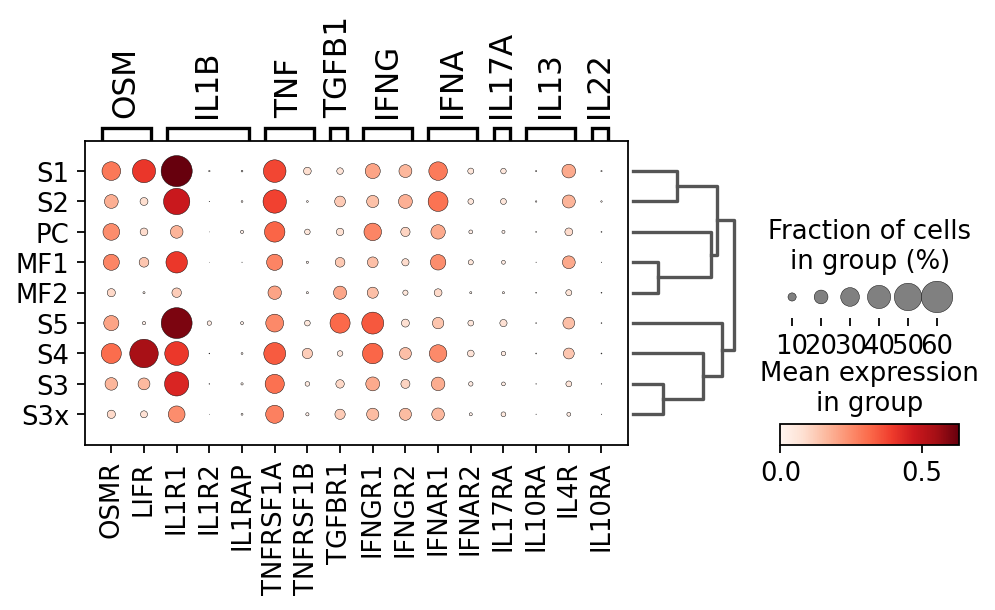

In [49]:
# IL1 ligands:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5756628/
receptors = ["OSMR", "LIFR", "IL1R1", "IL1R2", "IL1RAP", "TNFRSF1A", "TNFRSF1B", "IL17RA", "TGFBR1", "IFNGR1", "IFNGR2", "IFNAR1", "IFNAR2", "IL10RA", "IL4R", "IL13RA1"]

receptors = {
    "OSM": ["OSMR", "LIFR"],
    "IL1B": ["IL1R1", "IL1R2", "IL1RAP"],
    "TNF": ["TNFRSF1A", "TNFRSF1B"],
    "TGFB1": ["TGFBR1"],
    "IFNG": ["IFNGR1", "IFNGR2"],
    "IFNA": ["IFNAR1", "IFNAR2"],
    "IL17A": ["IL17RA"],
    "IL13": ["IL10RA", "IL4R"],
    "IL22": ["IL10RA"]
}
sc.pl.dotplot(adata,
              var_names=receptors,
              groupby='annot1', dendrogram=True, log=True,
              figsize=(7.0, 2.5),
              save="receptors3.pdf"
            )

categories: S1, S2, S3, etc.
var_group_labels: OSM, IL1B, TNF, etc.


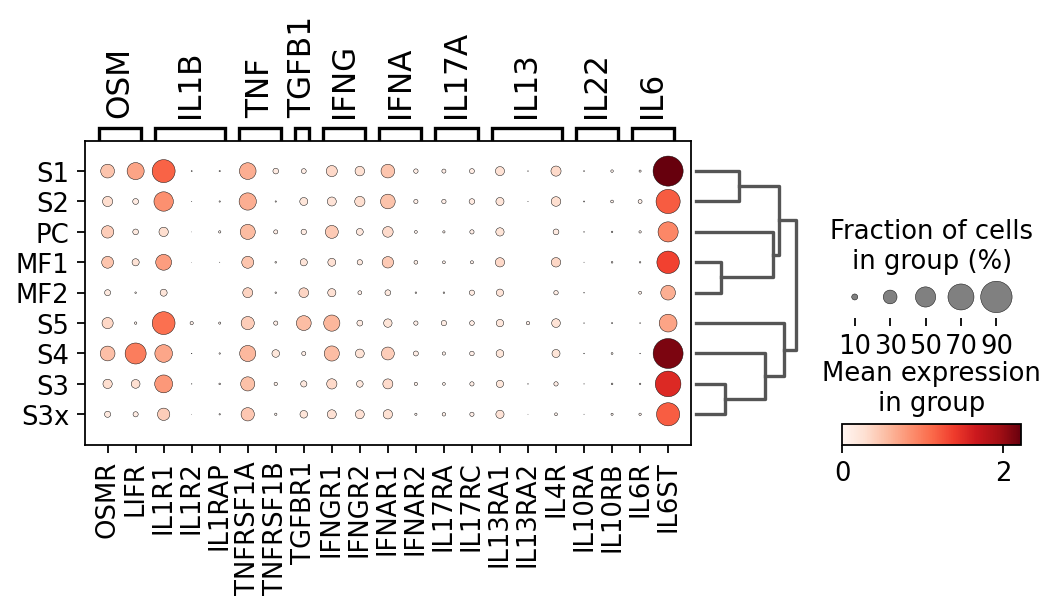

In [83]:
# IL1 ligands:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5756628/
receptors = ["OSMR", "LIFR", "IL1R1", "IL1R2", "IL1RAP", "TNFRSF1A", "TNFRSF1B", "IL17RA", "TGFBR1", "IFNGR1", "IFNGR2", "IFNAR1", "IFNAR2", "IL10RA", "IL4R", "IL13RA1"]

receptors = {
    "OSM": ["OSMR", "LIFR"],
    "IL1B": ["IL1R1", "IL1R2", "IL1RAP"],
    "TNF": ["TNFRSF1A", "TNFRSF1B"],
    "TGFB1": ["TGFBR1"],
    "IFNG": ["IFNGR1", "IFNGR2"],
    "IFNA": ["IFNAR1", "IFNAR2"],
    "IL17A": ["IL17RA", "IL17RC"],
    "IL13": ["IL13RA1", "IL13RA2", "IL4R"],
    "IL22": ["IL10RA", "IL10RB"],
    "IL6": ["IL6R", "IL6ST"]
}
sc.pl.dotplot(adata,
              var_names=receptors,
              groupby='annot1', dendrogram=True, log=False,
              figsize=(7.5, 2.5),
              save="receptors4.pdf"
            )

categories: S1, S2, S3, etc.
var_group_labels: OSM, IL1B, TNF, etc.


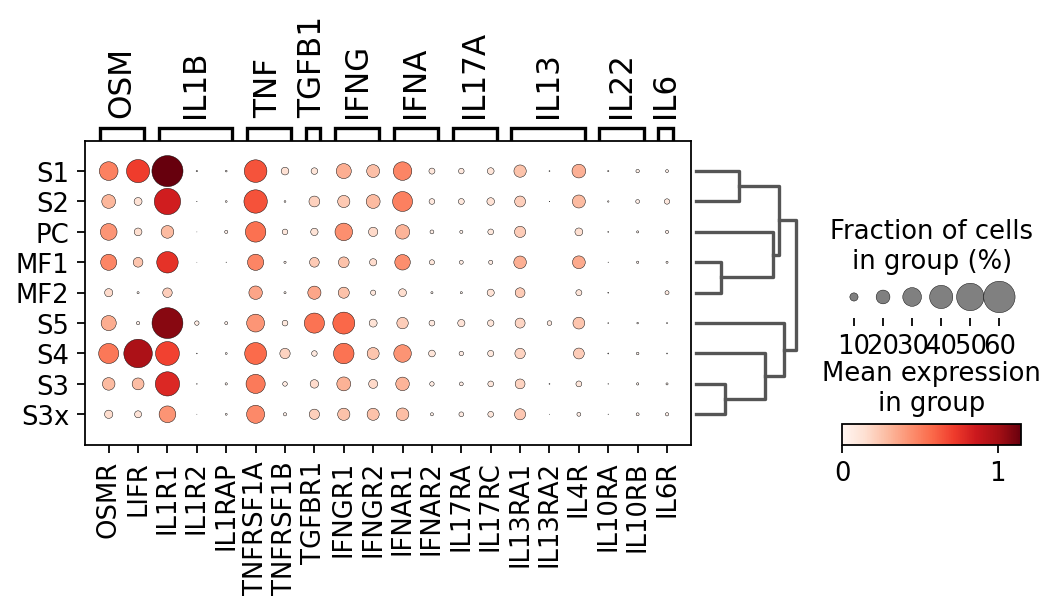

In [86]:
# IL1 ligands:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5756628/
receptors = ["OSMR", "LIFR", "IL1R1", "IL1R2", "IL1RAP", "TNFRSF1A", "TNFRSF1B", "IL17RA", "TGFBR1", "IFNGR1", "IFNGR2", "IFNAR1", "IFNAR2", "IL10RA", "IL4R", "IL13RA1"]

receptors = {
    "OSM": ["OSMR", "LIFR"],
    "IL1B": ["IL1R1", "IL1R2", "IL1RAP"],
    "TNF": ["TNFRSF1A", "TNFRSF1B"],
    "TGFB1": ["TGFBR1"],
    "IFNG": ["IFNGR1", "IFNGR2"],
    "IFNA": ["IFNAR1", "IFNAR2"],
    "IL17A": ["IL17RA", "IL17RC"],
    "IL13": ["IL13RA1", "IL13RA2", "IL4R"],
    "IL22": ["IL10RA", "IL10RB"],
    "IL6": ["IL6R"]
}
sc.pl.dotplot(adata,
              var_names=receptors,
              groupby='annot1', dendrogram=True, log=False,
              figsize=(7.5, 2.5),
              save="receptors5.pdf"
            )

In [66]:
adata

AnnData object with n_obs × n_vars = 26727 × 17590
    obs: 'doublet_bh_pval', 'n_counts', 'sample_id', 'scrublet_score', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'annot_batch1_lr', 'annot_batch1_lr_prob', 'annot_batch2_lr', 'annot_batch2_lr_prob', 'leiden_bk_r0_1', 'leiden_bk_r0_3', 'leiden_bk_r0_5', 'is_doublet', 'leiden_bk_split1', 'leiden_bk_split2', 'leiden_bk_split3', 'annot1', 'leiden_bk_split4', 'annot_gut_lr', 'annot_gut_lr_prob', 'broad_annot1'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'cc', 'highly_variable', 'highly_variable_nbatches', 'hvg_full'
    uns: 'annot1_colors', 'leiden', 'neighbors', 'neighbors_bk', 'pca', 'umap', 'dendrogram_anno

In [77]:
adata.var

gene_ids   mito   ribo     hb  n_counts  n_cells     cc  \
index                                                                        
AL627309.1  ENSG00000238009  False  False  False      45.0       44  False   
AL669831.5  ENSG00000237491  False  False  False     505.0      416  False   
FAM87B      ENSG00000177757  False  False  False      63.0       58  False   
LINC00115   ENSG00000225880  False  False  False     382.0      327  False   
FAM41C      ENSG00000230368  False  False  False     221.0      190  False   
...                     ...    ...    ...    ...       ...      ...    ...   
AC011043.1  ENSG00000276256  False  False  False     173.0      149  False   
AL592183.1  ENSG00000273748  False  False  False     549.0      487  False   
AC007325.4  ENSG00000278817  False  False  False     528.0      456  False   
AL354822.1  ENSG00000278384  False  False  False     581.0      468  False   
AC240274.1  ENSG00000271254  False  False  False     668.0      582  False   

            highly_variable  highly_variable_nbatches  hvg_full  
index                                                            
AL627309.1            False                         0     False  
AL669831.5             True                         4      True  
FAM87B                False                         0     False  
LINC00115              True                         4      True  
FAM41C                False                         1     False  
...                     ...                       ...       ...  
AC011043.1            False                         2     False  
AL592183.1            False                         1     False  
AC007325.4            False                         1     False  
AL354822.1            False                         3     False  
AC240274.1            False                         2     False  

[17590 rows x 10 columns]

In [70]:
adata.var.index[adata.var.index.str.contains("IL6R")]

Index(['IL6R-AS1', 'IL6R'], dtype='object', name='index')

In [74]:
adata.var.index[adata.var.index.str.contains("IL22RA1")]

Index([], dtype='object', name='index')

In [75]:
adata.var.index[adata.var.index.str.contains("IL22R1")]

Index([], dtype='object', name='index')

In [76]:
adata.var.index[adata.var.index.str.contains("IL-22")]

Index([], dtype='object', name='index')

In [78]:
adata.var[adata.var.gene_ids == "ENSG00000142677"]  # IL22RA1

Empty DataFrame
Columns: [gene_ids, mito, ribo, hb, n_counts, n_cells, cc, highly_variable, highly_variable_nbatches, hvg_full]
Index: []

In [79]:
adata.var.index[adata.var.index.str.contains("IL10R2")]

Index([], dtype='object', name='index')

In [80]:
adata.var.index[adata.var.index.str.contains("IL10R")]

Index(['IL10RA', 'IL10RB-DT', 'IL10RB'], dtype='object', name='index')